In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
from google.colab import files
import zipfile
import os

# Upload ZIP file
uploaded = files.upload()

# Extract ZIP file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('loan_data')  # Folder to extract

# Show contents
print("Extracted files:", os.listdir('loan_data'))


Saving archive (4).zip to archive (4) (1).zip
Extracted files: ['train_u6lujuX_CVtuZ9i.csv', 'test_Y3wMUE5_7gLdaTN.csv']


In [5]:
# Load training CSV using extracted path
train_df = pd.read_csv('loan_data/train_u6lujuX_CVtuZ9i.csv')


In [6]:
# Drop ID column
train_df.drop("Loan_ID", axis=1, inplace=True)

# Fill missing values
for col in train_df.select_dtypes(include='object').columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

for col in train_df.select_dtypes(include=['float64', 'int64']).columns:
    train_df[col].fillna(train_df[col].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = le.fit_transform(train_df[col])

# Split features and target
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-6-c10b75fe0442>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
<ipython-input-6-c10b75fe0442>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.6910569105691057
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



<ipython-input-8-85ff0234d300>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


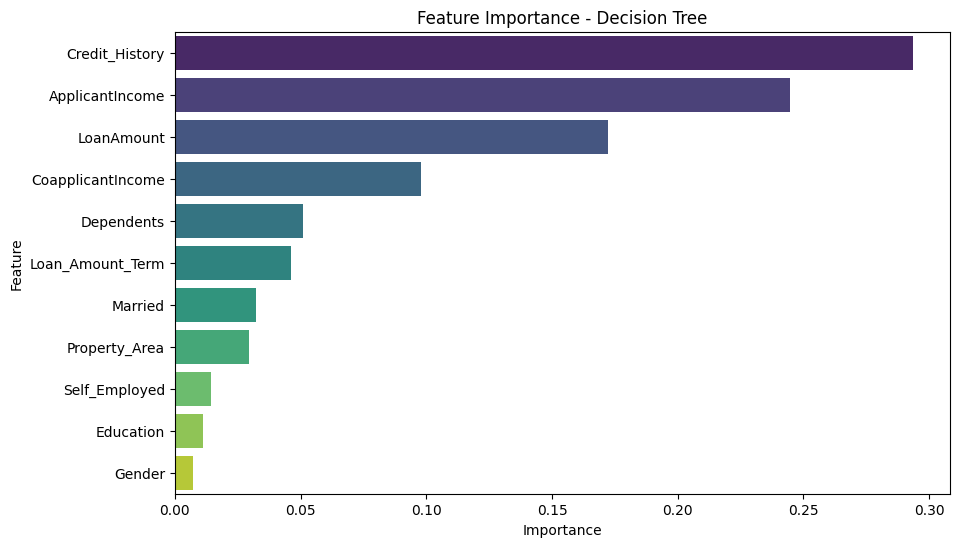

In [8]:
importances = model.feature_importances_
features = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Decision Tree")
plt.show()
